>> # ENTRO

 # Breast Cancer Detection using deep learning

 - Breast cancer is the second leading cause of cancer deaths among U.S. women, it is a type of cancer that starts when cells begin to grow out of control, 
 - Most breast cancers begin in the ducts that  carry milk to the nipple (ductal cancers), 
 - Breast cancer can spread when the cancer cells get into the blood or lymph system and are carried to other parts of the body. 
 - Cancerous breast tumors are detected by a special type of examination, which is screening mammogram

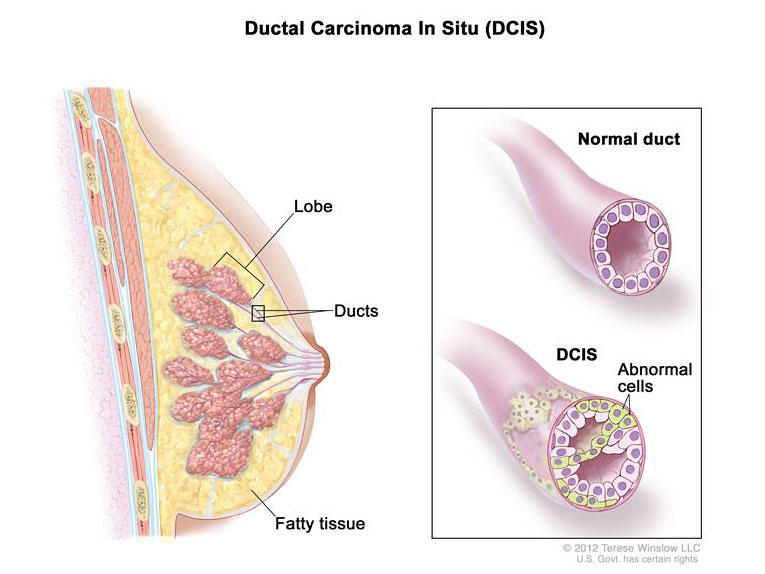

Detection of breast cancer on screening mammography is challenging as an image classification task because the tumors themselves occupy only a small portion of the image of the entire breast. For example, a full-field digital mammography (FFDM) image is typically 4000 × 3000 pixels while a potentially cancerous region of interest (ROI) can be as small as 100 × 100 pixels.
example: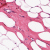



 This explains the large number that we have in the data, which is more than **a quarter of a million** images!

**Our goal:** Given a patient and a patch of a tissue slice predict wheather it contains IDC or not.

## Table of contents:

In [ ]:
##

In [ ]:
##

>> # CODE

> # Import  Libraries 

In [26]:
import os
import numpy as np
import shutil
import pandas as pd
from skimage.util import random_noise
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from skimage.filters import gaussian


> #  Get & Adjust Data

In [32]:
cancer_rays_dir     = os.listdir("Desktop\\final_proj\\breast_hostopathology_images_dataset\\") 
all_rays_dir        = "Desktop\\final_proj\\all_rays_dir" 
cancer_rays_dir_str ="Desktop\\final_proj\\breast_hostopathology_images_dataset\\"

In [33]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [34]:
# os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('Desktop\\final_proj\\all_rays_dir')

- ### Collect all the images in one folder with modifying their id to using with them

In [35]:
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [36]:
len(all_rays_dir_lst)

277524

- ### Put images in a data_frame for easy access

In [37]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [38]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

,image_id,target
0,10253_idx5_x1001_y1001_class0.png,0
1,10253_idx5_x1001_y1051_class0.png,0
2,10253_idx5_x1001_y1101_class0.png,0
3,10253_idx5_x1001_y1151_class0.png,0
4,10253_idx5_x1001_y1201_class0.png,0
5,10253_idx5_x1001_y1251_class0.png,0
6,10253_idx5_x1001_y1301_class0.png,0
7,10253_idx5_x1001_y1351_class0.png,0
8,10253_idx5_x1001_y1501_class0.png,0
9,10253_idx5_x1001_y1551_class0.png,0


In [39]:
data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

> # EDA 

## Healthy patches:


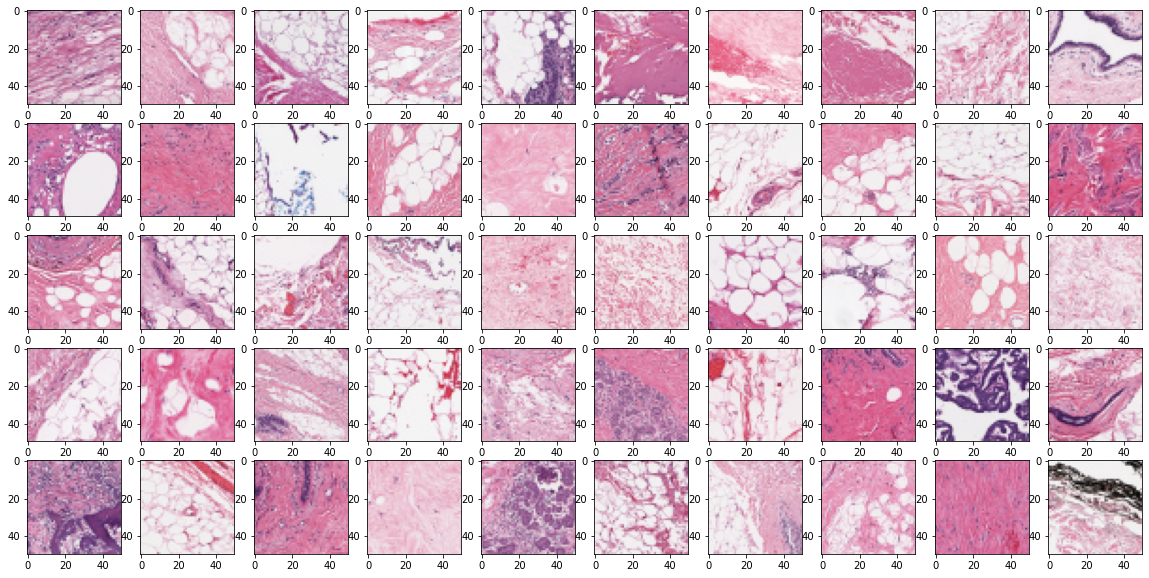

In [40]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)



# Cancer patches:


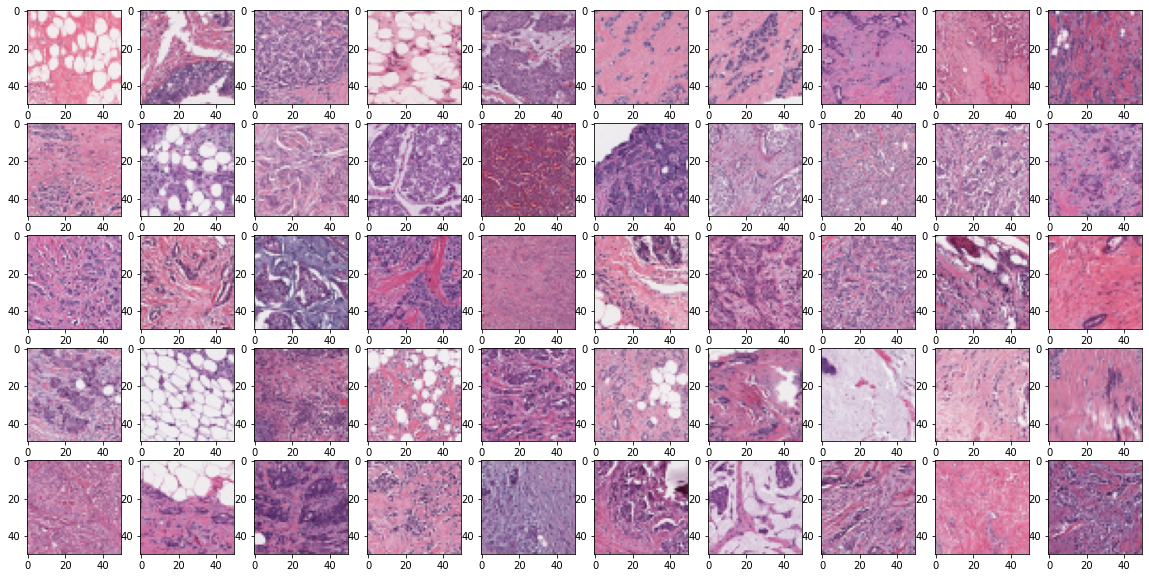

In [41]:
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


C:\Users\yasmin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yasmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


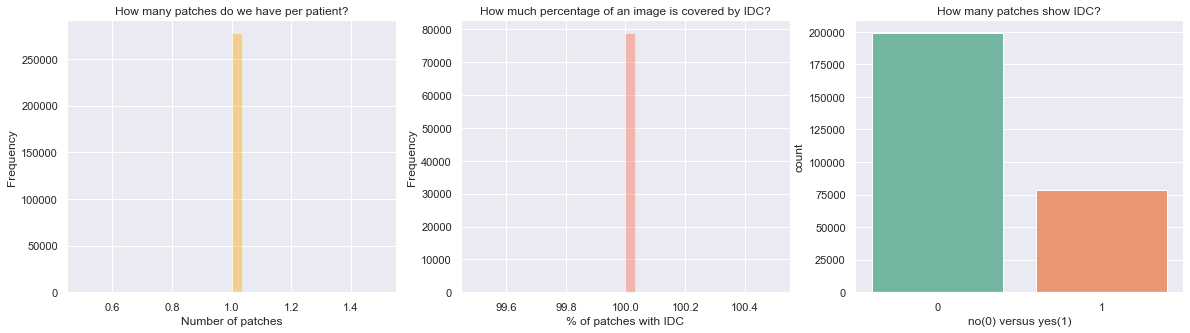

In [49]:
import seaborn as sns
sns.set()
cancer_perc = data.groupby("image_id").target.value_counts()/ data.groupby("image_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("image_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

> # Processing and selection

# Image Processing 

- ## Apply some processing properties

In [ ]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

In [ ]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

In [ ]:
noise_image = random_noise(image)
plt.imshow(noise_image)

In [ ]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

- ## Processing using [random_noise] function

In [ ]:
os.mkdir('Desktop\\final_proj\\image_processing')
os.mkdir('Desktop\\final_proj\\image_processing\\noise_images')

In [ ]:
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'\\'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('Desktop\\final_proj\\image_processing\\noise_images',fname)
    mpimg.imsave(new_path, noise_image)
    

In [ ]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_train\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_train\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_test\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_test\\ones')


In [ ]:
processd_lst = os.listdir('Desktop\\final_proj\\image_processing\\noise_images')
processd_lst_str = 'Desktop\\final_proj\\image_processing\\noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

In [ ]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

In [ ]:
processd_data['target'].value_counts()

In [ ]:
for image in processd_test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("Desktop\\final_proj\\image_processing\\processd_data_test", label, fname)
    shutil.copyfile(src, dst)


In [ ]:
processd_data.set_index('image_id', inplace=True)
for image in processd_train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\processd_data_train', label, fname)
    shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_train\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_train\\ones')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_test\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_test\\ones')))

# Processing  and Normal test

- ### the images we processed and the noraml of the photos are tested on the same model to see who is the best in the accuracy

- ### A small sample is taken for testing (20,000) images

### First: the processed images

In [ ]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\trainig\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\trainig\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\testing\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\testing\\ones')

In [ ]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\model_tst\\trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\model_tst\\testing', label, fname)
    shutil.copyfile(src, dst)    


In [ ]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\model_tst\\trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\model_tst\\testing",target_size=(50,50),batch_size=10,class_mode='categorical')

In [ ]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

### Second: the normal images

In [ ]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst') 
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing\\ones')

In [ ]:
df_0 = data[data['target'] == '0'].sample(10000, random_state=101)
df_1 = data[data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing', label, fname)
    shutil.copyfile(src, dst)    


In [ ]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing",target_size=(50,50),batch_size=10,class_mode='categorical')

In [ ]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

## note < Normal images are the best in modeling >

In [ ]:
ss

> # Modeling

# Data Spliting & Generation

In [ ]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [ ]:
print(data_train.shape)
print(data_test.shape)

In [ ]:
os.mkdir( 'Desktop\\final_proj\\train_dir')
os.mkdir('Desktop\\final_proj\\test_dir')

In [ ]:
os.mkdir( 'Desktop\\final_proj\\train_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\train_dir\\ones')

os.mkdir( 'Desktop\\final_proj\\test_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\test_dir\\ones')


In [ ]:
train = data_train.image_id
test  = data_test.image_id

In [ ]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\train_dir', label, fname)
    shutil.copyfile(src, dst)

In [ ]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("Desktop\\final_proj\\test_dir", label, fname)
    shutil.copyfile(src, dst)


In [ ]:
print('non-IDC train      =',len(os.listdir('Desktop\\final_proj\\train_dir\\zeros')))
print('IDC train          =',len(os.listdir('Desktop\\final_proj\\train_dir\\ones')))
print('non-IDC validation =',len(os.listdir('Desktop\\final_proj\\test_dir\\zeros')))
print('IDC validation     =',len(os.listdir('Desktop\\final_proj\\test_dir\\ones')))

In [ ]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generation = data_generation.flow_from_directory(
                                        "Desktop\\final_proj\\train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "Desktop\\final_proj\\test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')



># Model design

In [ ]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))


my_model.add(Flatten())

my_model.add(Dense(128,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

># Outputs and Outcomes

In [ ]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

In [ ]:
losse[['accuracy','val_accuracy']].plot()


In [ ]:
losse[['loss','val_loss']].plot()


In [ ]:
# Score&Confusion Matrix & Classification Report